# Uncertainty Quantification Project

## Codes Part III

### Abhishek Chandra - M2CHPS (University of Lille)

In [8]:
# importing support libraries

import numpy as np                   # for making arrays, martix, calculating mean, variance etc.
import matplotlib.pyplot as plt      # for plottimg histograms etc
from scipy.stats import norm         # To use in gaussian distribution

In [9]:
# Defining constant input parameters of the model

rcul = 8.8e-3          # radius of the iron core
rbob = 17e-3           # external radius of the coil
rclo = 20e-3           # external radius
raim = 9.4e-3          # radius of the magnet

hclo = 6e-3            # height of base of the yoke
hent = 6e-3            # height of the air gap
hbob = 9e-3            # height of the coil
hpm = 5e-3             # height of the mobil plate

mur = 3000             # relative permeability of the yoke
n = 3200               # number of turns

In [10]:
# Defining random input parameters of the model (at the moment feeding deterministic values)

br = 1.2               # remanent magnetic flux density of the magnet     uncertainty - 5%
haim = 10e-3           # height of the magnet                             uncertainty - 5%
e = 0.5e-3             # air gap between the core and the yoke            uncertainty - 15%
ep = 5e-5              # parasitic air gap                                uncertainty - 40%
current = 0.0652       # current in the coil                              uncertainty - 10%

In [11]:
# Defining Constant
mu0=4*np.pi*1e-7                                                 # permeability of the air

#Calculation of the reluctances
Re=e/(mu0*2*np.pi*(rbob-e)*hent)                                  # reluctance of the airgap
Rp=ep/(mu0*np.pi*rcul*rcul)+ep/(mu0*np.pi*(rclo*rclo-rbob*rbob))  # reluctance of the paraistic airgap
Ra=haim/(mu0*np.pi*raim*raim)                                     # reluctance of the magnet
ksia=br*haim/mu0                                                  # magnetomotive force of the magnet

# Calculation of the flux
# When no currrent is supplied

phia1=((Rp+Re)*ksia)/(Ra*Rp+Ra*Re+Re*Rp)                          # flux flowing through the permanent magnet
phib1=-(Re*ksia)/(Ra*Rp+Ra*Re+Re*Rp)                              # magnetic flux in the mobil plate

#calculation of force 1
force1=np.abs((phib1*phib1)/(2*mu0*np.pi*rcul*rcul)+phib1*phib1/(2*mu0*np.pi*(rclo*rclo-rbob*rbob)))

# When currrent is supplied

phia2=((Rp+Re)*(ksia)-(Re*n*current))/((Ra*Rp)+(Ra*Re)+(Re*Rp))   # flux flowing through the permanent magnet
phib2=((Ra+Re)*n*current-Re*ksia)/(Ra*Rp+Ra*Re+Re*Rp)             # magnetic flux in the mobil plate

#calculation of force 2
force2=np.abs((phib2*phib2)/(2*mu0*np.pi*rcul*rcul)+phib2*phib2/(2*mu0*np.pi*(rclo*rclo-rbob*rbob)))
print("Determinitic mean of force 1: ",np.mean(force1))
print("Determinitic mean of force 2: ",np.mean(force2))
print("Determinitic std of force 1: ",np.std(force1))
print("Determinitic std of force 2: ",np.std(force2))

Determinitic mean of force 1:  147.80442684301696
Determinitic mean of force 2:  0.00015857704866025844
Determinitic std of force 1:  0.0
Determinitic std of force 2:  0.0


#  Part III - Antithetic

In [12]:
# Defining R - number of samples to be generated

R = 10000

In [13]:
# Defining bounds of br from which samples have to be generated
br_min = br - 0.05*br
br_max = br + 0.05*br
haim_min = haim - 0.05*haim  
haim_max = haim + 0.05*haim   
e_min = e - 0.15*e
e_max = e + 0.15*e
ep_min = ep - 0.4*ep 
ep_max = ep + 0.4*ep 
current_min = current  - 0.1*current
current_max = current  + 0.1*current

### We start with having uncertainties in one input at a time. Uncomment the parameter which you want to make nondeterministic. We start with uniform distribution

In [14]:
# Generating R samples from uniform distribution -- uncomment the required one

br = np.random.uniform(br_min, br_max, R)
br_prime = br_min + br_max - br
haim = np.random.uniform(haim_min, haim_max, R)
haim_prime = haim_min + haim_max - haim
e = np.random.uniform(e_min, e_max, R)
e_prime = e_min + e_max - e
ep = np.random.uniform(ep_min, ep_max, R)
ep_prime = ep_min + ep_max - ep
current = np.random.uniform(current_min, current_max, R)
current_prime = current_min + current_max - current

In [15]:
rcul=8.8e-3                                        #radius of the iron core (m)
rbob=17e-3                                        #external radius of the coil (m)
rclo=20e-3                                        #external radius (m)
raim=9.4e-3                                      #Radius of the magnet (m)
hclo=6e-3                                       #height of base of the yoke (m)
hent=6e-3                                      #height of the air gap e (m)
hbob=9e-3                                       #height of the coil (m)
hpm=5e-3                                        #height of the mobil plate (m)
mur=3000                                        #relative permeability of the yoke
n=3200                                        #number of turns
#CONSTANTS
#permeability of the air
mu0=4*np.pi*1e-7
Re=e/(mu0*2*np.pi*(rbob-e)*hent)                                  #reluctance of the airgap
Rp=ep/(mu0*np.pi*rcul*rcul)+ep/(mu0*np.pi*(rclo*rclo-rbob*rbob))  #reluctance of the paraistic airgap
Ra=haim/(mu0*np.pi*raim*raim)                                     #reluctance of the magnet
ksia=br*haim/mu0                                                #magnetomotive force of the magnet
#Not supplied
#Calculation of the flux
#flux flowing through the permanent magnet
phia1=((Rp+Re)*ksia)/(Ra*Rp+Ra*Re+Re*Rp)
#magnetic flux in the mobil plate
phib1=-(Re*ksia)/(Ra*Rp+Ra*Re+Re*Rp)
force1=np.abs((phib1*phib1)/(2*mu0*np.pi*rcul*rcul)+phib1*phib1/(2*mu0*np.pi*(rclo*rclo-rbob*rbob)))
#Supplied by a current
#Calculation of the flux
#flux flowing through the permanent magnet
phia2=((Rp+Re)*(ksia)-(Re*n*current))/((Ra*Rp)+(Ra*Re)+(Re*Rp))
#magnetic flux in the mobil plate
phib2=((Ra+Re)*n*current-Re*ksia)/(Ra*Rp+Ra*Re+Re*Rp)
#calculation of the force
force2=np.abs((phib2*phib2)/(2*mu0*np.pi*rcul*rcul)+phib2*phib2/(2*mu0*np.pi*(rclo*rclo-rbob*rbob)))

In [16]:
mu0=4*np.pi*1e-7
Re_prime=e_prime/(mu0*2*np.pi*(rbob-e)*hent)                                  #reluctance of the airgap
Rp_prime=ep_prime/(mu0*np.pi*rcul*rcul)+ep_prime/(mu0*np.pi*(rclo*rclo-rbob*rbob))  #reluctance of the paraistic airgap
Ra_prime=haim_prime/(mu0*np.pi*raim*raim)                                     #reluctance of the magnet
ksia_prime=br_prime*haim_prime/mu0                                                #magnetomotive force of the magnet
#Not supplied
#Calculation of the flux
#flux flowing through the permanent magnet
phia1_prime=((Rp_prime+Re_prime)*ksia_prime)/(Ra_prime*Rp_prime+Ra_prime*Re_prime+Re_prime*Rp_prime)
#magnetic flux in the mobil plate
phib1_prime=-(Re_prime*ksia_prime)/(Ra_prime*Rp_prime+Ra_prime*Re_prime+Re_prime*Rp_prime)
force1_prime=np.abs((phib1_prime*phib1_prime)/(2*mu0*np.pi*rcul*rcul)+phib1_prime*phib1_prime/(2*mu0*np.pi*(rclo*rclo-rbob*rbob)))
#Supplied by a current
#Calculation of the flux
#flux flowing through the permanent magnet
phia2_prime=((Rp_prime+Re_prime)*(ksia_prime)-(Re_prime*n*current_prime))/((Ra_prime*Rp_prime)+(Ra_prime*Re_prime)+(Re_prime*Rp_prime))
#magnetic flux in the mobil plate
phib2_prime=((Ra_prime+Re_prime)*n*current-Re_prime*ksia_prime)/(Ra_prime*Rp_prime+Ra_prime*Re_prime+Re_prime*Rp_prime)
#calculation of the force
force2_prime=np.abs((phib2_prime*phib2_prime)/(2*mu0*np.pi*rcul*rcul)+phib2_prime*phib2_prime/(2*mu0*np.pi*(rclo*rclo-rbob*rbob)))

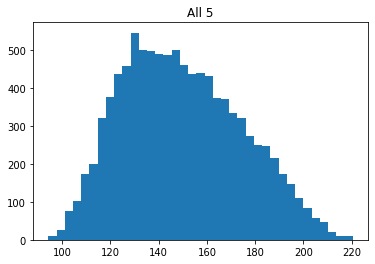

In [18]:
m1 = np.mean(force1)
m1_prime = np.mean(force1_prime)
m2 = np.mean(force2)
m2_prime = np.mean(force2_prime)

M1 = 0.5*(m1+m1_prime)
M2 = 0.5*(m2+m2_prime)

s1 = np.std(force1)
s1_prime = np.std(force1_prime)
s2 = np.std(force2)
s2_prime = np.std(force2_prime)

S1 = 0.5*(s1+s1_prime)
S2 = 0.5*(s2+s2_prime)

S1 = s1/np.sqrt(R)
S2 = s2/np.sqrt(R)

plt.hist(force1,bins = 'auto')
#plt.hist(force2, bins = 'auto')
#plt.show()
#print("mean for Force1",M1)
#print("mean for Force2",M2)
#print("standard deviation for force1 by sqrt R",S1)
#print("standard deviation for force2 by sqrt R",S2)

plt.title("All 5")
plt.savefig("antithetic all force1.jpg")